# [CS 6320 Project 3: Local Feature Matching]
<img src="figures/eval.jpg" alt="drawing" width="600" title="eval"/>


## Brief
    Hand-in: through Canvas
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
                    <your_uid>_proj3.pdf

## Overview

The goal of this assignment is to create a local feature matching algorithm using techniques described in Szeliski chapter 7.1. The pipeline we suggest is based on a simplified version of the famous SIFT pipeline. However, we will not be implementing this in the classical fashion. We will be implementing it as though it were part of a neural network. The matching pipeline is intended to work for instance-level matching – multiple views of the same physical scene.

This project is intended to further familiarize you with Python, PyTorch, and local feature matching. Once again, you may find these resources helpful. Python: [here](https://docs.python.org/3/tutorial/). PyTorch: [here](https://pytorch.org/tutorials/).

### Setup

   0. Unzip proj3_6320.zip and go to proj3_6320 directory.
      - You can run `unzip proj3_6320.zip && cd proj3_6320` in your terminal.
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyways.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj3_env_<OS>.yml`.
    - NOTE that proj3_env_<OS>.yml is inside the project folder.
   3. This should create an environment named ‘proj3’. Activate it using the Windows command, activate proj3 or the MacOS / Linux command, source activate proj3
   4. Install the project package, by running `pip install -e .`   inside the repo folder.
   5. Run the notebook using `jupyter notebook` under *proj3_6320* directory.
   6. Ensure that all sanity checks are passing by running `pytest` tests inside the repo folder.
   7. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 


<!-- ## Library Functions 
Do not use any library functions to implement Hough Transform. -->


### Writeup
For this project, you need to run all your cells and then convert the notebook into pdf. A conversion way is to use the tool provided by Jupyter. Click the items on the menu of this website page:

`File -> Download as -> PDF via LaTeX(.pdf)`
    
You can refer [here](1) in case you encounter any problem.
    
[1]: https://stackoverflow.com/questions/29156653/ipython-jupyter-problems-saving-notebook-as-pdf
    
Your code, results, visualization, and discussion will be used for the grading. You will be deducted points if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it seperately if you need to run a cell multiple times and thus every result is displayed in the cell.


### Rubric
* +40 pts: HarrisNet implementation in HarrisNet.py    
* +40 pts: SIFTNet implementation in SIFTNet.py
* +10 pts: Feature matching implementation in student_feature_matching.py
* +10 pts: pdf report

Distribution of the points in a Question is separately mentioned for each sub-task

* -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
### Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. `<your_uid>`.zip containing:
    `<your_gt_username>`.zip via Canvas containing:
    - proj3_code/ - directory containing all your code for this assignment (including HarrisNet.py, SIFTNet.py, !)
    - additional_data/ - (optional) if you use any data other than the images we provide you, please include them here
    - README.txt - (optional) if you implement any new functions other than the ones we define in the skeleton code (e.g. any extra credit implementations), please describe what you did and how we can run the code. We will not award any extra credit if we can’t run your code and verify the results.

2. `<your_gt_username>`_proj3.pdf via Gradescope - your report

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid `<your_uid>` (it will zip up the appropriate directories/files for you!)

## This iPython notebook:  
    (1) Loads and resizes images  
    (2) Finds interest points in those images                 **(you code this)**  
    (3) Describes each interest point with a local feature    **(you code this)**  
    (4) Finds matching features                               **(you code this)**  
    (5) Visualizes the matches  
    (6) Evaluates the matches based on ground truth correspondences  
### Data
We provide you with 3 pairs of pictures of the Notre Dame, Mt. Rushmore, and the Episcopal Palace(which we refer to as Gaudi). Each image in a pair is of the same object but from a slightly different viewpoint, and was taken under differing conditions. These images will be run through the entire local feature matching pipeline, first extracting interest points, then extracting features, and finally feature matching to get correspondences across images. The image at the top of the page is what the final evaluation looks like. **Interest points are matched across images and correct ones (according to an annotated ground truth) are marked with <span style="color:green">green lines</span> and incorrect with <span style="color:red">red</span>**. You are also free to test images of your own, you will just have to annotate them with a script we provide you with in the annotate_correspondences folder.

**<span style="color:red">Your accuracy on the Notre Dame image pair must be at least 80% for the 100 most confident matches to receive full credit!</span>**

**Potentially useful NumPy Python library) or pytorch functions**: There are more details for these in each specific function header.

**Forbidden functions** (you can use these for testing, but not in your final code): anything that takes care of any of the main functions you’ve been asked to implement. If it feels like you’re sidestepping the work, then it’s probably not allowed. Ask the TAs if you have any doubts.


**Additional_data**: If you want to test on your own data/images, please put them in the subdirectory 'proj3_6320/additional_data', which will be included in the zip file for the submission. 

**IMPORTANT**: **<span style="color:red">PLEASE START THIS PROJECT EARLY</span> as you might need much effort on the pytorch functions. 

### Testing
We have provided a set of tests for you to evaluate your implementation. We have included tests inside proj3.ipynb so you can check your progress as you implement each section. When you’re done with the entire project, you can call additional tests by running pytest unit_tests inside the root directory of the project. **Your grade on the coding portion of the project will be further evaluated with a set of tests not provided to you**.

## Set up

In [1]:
import sys
sys.path.append('..')

shape of image1_bw: torch.Size([1, 1, 1024, 768])
shape of image2_bw: torch.Size([1, 1, 1016, 762])


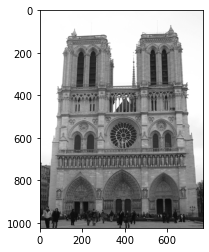

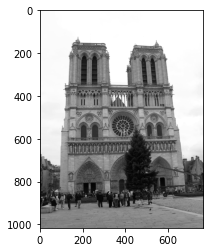

In [2]:
# %matplotlib inline
# %matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

from proj3_code.utils import load_image, PIL_resize, rgb2gray
from IPython.core.debugger import set_trace
import torch
import torchvision
import torchvision.transforms as transforms

# Notre Dame
image1 = load_image('../data/1a_notredame.jpg')
image2 = load_image('../data/1b_notredame.jpg')
eval_file = '../ground_truth/notredame.pkl'

# # Mount Rushmore -- this pair is relatively easy (still harder than Notre Dame, though)
# image1 = load_image('../data/2a_rushmore.jpg')
# image2 = load_image('../data/2b_rushmore.jpg')
# eval_file = '../ground_truth/rushmore.pkl'

# # Episcopal Gaudi -- This pair is relatively difficult
# image1 = load_image('../data/3a_gaudi.jpg')
# image2 = load_image('../data/3b_gaudi.jpg')
# eval_file = '../ground_truth/gaudi.pkl'

scale_factor = 0.5
image1 = PIL_resize(image1, (int(image1.shape[1]*scale_factor), int(image1.shape[0]*scale_factor)))
image2 = PIL_resize(image2, (int(image2.shape[1]*scale_factor), int(image2.shape[0]*scale_factor)))

image1_bw = rgb2gray(image1)
image2_bw = rgb2gray(image2)
plt.figure(figsize=(4,4)); plt.imshow((image1_bw*255).astype(np.uint8), cmap='gray');
plt.figure(figsize=(4,4)); plt.imshow((image2_bw*255).astype(np.uint8), cmap='gray');

#convert images to tensor
tensor_type = torch.FloatTensor
torch.set_default_tensor_type(tensor_type)
to_tensor = transforms.ToTensor()

image_input1 = to_tensor(image1_bw).unsqueeze(0)
image_input2 = to_tensor(image2_bw).unsqueeze(0)
print('shape of image1_bw:', image_input1.shape)
print('shape of image2_bw:', image_input2.shape)


# Part 1: Harris Corner Detector 
**NOTE**: Before starting this project, please look at [here](https://cs231n.github.io/convolutional-networks/) and [here]( http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture05.pdf) for better understanding of CNN in case you are confused about the convolutional operation.
You'd better also understand [group](https://discuss.pytorch.org/t/conv2d-certain-values-for-groups-and-out-channels-dont-work/14228/2) parametes well for nn.Conv2d(). 
## Find distinctive points in each image (Szeliski 7.1.1)

<img src="figures/HarrisNet.png" alt="drawing" width="800" title="Overview of HarrisNet pipeline"/>

The original Harris corner detector is described in the lecture materials(see 11_feature_detection.pdf) and Szeliski 7.1.1. You do not need to worry about scale invariance or keypoint orientation estimation for your baseline Harris corner detector. The original paper by Chris Harris and Mike Stephens describing their corner detector can be found [here](http://www.bmva.org/bmvc/1988/avc-88-023.pdf). We will be implementing the Harris detector using a Neural Network - HarrisNet. Our network has 5 layers (all of which you will have to implement), described briefly below:

   * **ImageGradientsLayer**  - retrieves image gradients in each direction. This layer is already implemented for you, but you’ll need to implement get_sobel_xy_parameters() in torch_layer_utils.py for it to work.
   * **ChannelProductLayer**  - returns product between channel of the previous layer Ixx, Iyy and Ixy.
   * **SecondMomentMatrixLayer** - computes Second Moment Matrix.
   * **CornerResponseLayer**  - computes the R cornerness matrix over the entire image.
   * **NMSLayer** - performs non-maxima suppression to keep only the strongest corners in local regions.
   
After passing images through the entire network, we still need to extract specific coordinates as our interest points, which is done in get_interest_points() (you will implement this) in HarrisNet.py.

In [3]:
## Verify each layer in the code, this will check if your implementation is correct or not.

## Do not modify the constructor of any layer (i.e. to take some custom arguments
## as input)

from unit_tests.harris_unit_test import (
    test_ImageGradientsLayer,
    test_ChannelProductLayer, 
    test_SecondMomentMatrixLayer, 
    test_CornerResponseLayer, 
    test_NMSLayer,
    verify
)

print('ImageGradientsLayer:', verify(test_ImageGradientsLayer))
print('ChannelProductLayer:', verify(test_ChannelProductLayer))
print('SecondMomentMatrixLayer:', verify(test_SecondMomentMatrixLayer))
print('CornerResponseLayer:', verify(test_CornerResponseLayer) )
print('NMSLayer:', verify(test_NMSLayer))


ImageGradientsLayer: "Correct"
ChannelProductLayer: "Correct"
torch.Size([3, 1, 1, 1])
torch.Size([3, 1, 3, 3])
SecondMomentMatrixLayer: "Correct"
CornerResponseLayer: "Correct"
NMSLayer: "Correct"


In [4]:
from proj3_code.HarrisNet import get_interest_points

Here we will call get_interest_points function in HarrisNet.py to detect 'interesting' points in the images. 

**IMPORTANT**
Make sure to add your code in get_interest_points function to call Harris Corner Detector.

torch.Size([3, 1, 7, 7])
torch.Size([3, 1, 7, 7])
4358 corners in image 1, 4314 corners in image 2


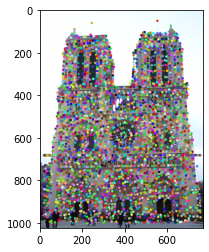

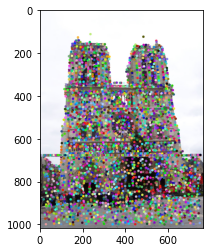

In [5]:
from utils import show_interest_points

x1, y1, _ = get_interest_points(image_input1)
x2, y2, _ = get_interest_points(image_input2)

x1, x2 = x1.detach().numpy(), x2.detach().numpy()
y1, y2 = y1.detach().numpy(), y2.detach().numpy()

# Visualize the interest points
c1 = show_interest_points(image1, x1, y1)
c2 = show_interest_points(image2, x2, y2)
plt.figure(); plt.imshow(c1)
plt.figure(); plt.imshow(c2)
print('{:d} corners in image 1, {:d} corners in image 2'.format(len(x1), len(x2)))

# Part 2: Sift Feature Descriptor
## Create feature vectors at each interest point (Szeliski 7.1.2)

<img src="figures/SIFTNet.png" alt="drawing" width="800" title="Overview of SIFTNet pipeline"/>


You will implement a SIFT-like local feature based on the lecture materials and Szeliski 7.1.2. We will be implementing Sift using a neaural network - SIFTNet. This network has 4 layers (which you will have to implement unless specified otherwise), described briefly below:

* **ImageGradientsLayer** - computes image gradients in each direction (already implemented for you).
* **SIFTOrientationLayer** - extracts gradient information along each orientation direction. In the original SIFT, we would be trying to find the contributions of our gradients to each orientation bin. Note that we can do this by trying to find the contribution of each gradient along each orientation vector, which is the same as finding the projection of our gradients onto our orientation vectors. Recall that this can be done using dot products!
* **HistogramLayer** - creates weighted histograms over the entire image.
* **SubGridAccumulationLayer** - creates feature vectors that accumulate histograms from a region.
After passing images through the network we will have feature vectors over the entire image, but we need only want features from the specific interest point locations that we found. This will be done in get_SIFTNet_features() (you will implement this) in SIFTNet.py.

In [6]:
from proj3_code.SIFTNet import (
    angles_to_vectors_2d_pytorch,
    HistogramLayer,
    SubGridAccumulationLayer,
    SIFTOrientationLayer,
    get_sift_subgrid_coords,
    get_siftnet_features
)
from proj3_code.torch_layer_utils import ImageGradientsLayer
from unit_tests.sift_unit_test import (
    test_angles_to_vectors_2d_pytorch,
    test_HistogramLayer,
    test_ImageGradientsLayer,
    test_SubGridAccumulationLayer,
    test_SIFTOrientationLayer,
    test_get_sift_subgrid_coords,
    test_SIFTNet,
    test_get_siftnet_features
)

print('angles_to_vectors_2d_pytorch:', verify(test_angles_to_vectors_2d_pytorch))
print('HistogramLayer:', verify(test_HistogramLayer))
print('ImageGradientsLayer:', verify(test_ImageGradientsLayer))
print('SIFTOrientationLayer:', verify(test_SIFTOrientationLayer) )
print('SIFTNet:', verify(test_SIFTNet) )
print('SubGridAccumulationLayer:', verify(test_SubGridAccumulationLayer))
print('get_sift_subgrid_coords:', verify(test_get_sift_subgrid_coords) )
print('get_siftnet_features:', verify(test_get_siftnet_features))

angles_to_vectors_2d_pytorch: "Correct"
HistogramLayer: "Correct"
ImageGradientsLayer: "Correct"
SIFTOrientationLayer: "Correct"
SIFTNet: "Correct"
SubGridAccumulationLayer: "Correct"
get_sift_subgrid_coords: "Correct"
get_siftnet_features: "Correct"


In [7]:
image1_features = get_siftnet_features(image_input1, x1, y1)
image2_features = get_siftnet_features(image_input2, x2, y2)

## Match features (Szeliski 7.1.3)

You will implement the “ratio test” or “nearest neighbor distance ratio test” method of matching local features as described in the lecture materials and Szeliski 7.1.3. See equation 7.18 in particular. You will implement this in student_feature_matching.py. The potential matches that pass the ratio test the easiest should have a greater tendency to be correct matches–think about why.

In [8]:
#test your feature matching implementation
from unit_tests.feature_match_test import test_feature_matching, test_compute_dists
print('compute_dists:', verify(test_compute_dists))
print('feature_matching:', verify(test_feature_matching))

compute_dists: "Correct"
feature_matching: "Correct"


In [9]:
from student_feature_matching import match_features
matches, confidences = match_features(image1_features, image2_features, x1, y1, x2, y2)
print('{:d} matches from {:d} corners'.format(len(matches), len(x1)))

280 matches from 4358 corners


## Visualization

You might want to set 'num_pts_to_visualize' and 'num_pts_to_evaluate' to some constant (e.g. 100) once you start detecting hundreds of interest points, otherwise things might get too cluttered. You could also threshold based on confidence.  
  
There are two visualization functions below. You can comment out one of both of them if you prefer.

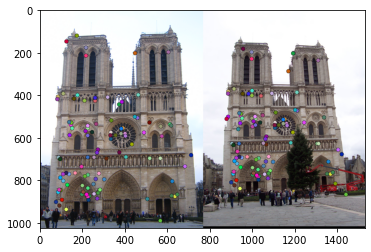

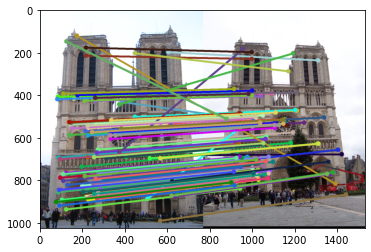

In [11]:
from proj3_code.utils import show_correspondence_circles, show_correspondence_lines
# num_pts_to_visualize = len(matches)
num_pts_to_visualize = 100
c1 = show_correspondence_circles(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c1)
plt.savefig('../results/vis_circles.jpg', dpi=1000)
c2 = show_correspondence_lines(image1, image2,
                    x1[matches[:num_pts_to_visualize, 0]], y1[matches[:num_pts_to_visualize, 0]],
                    x2[matches[:num_pts_to_visualize, 1]], y2[matches[:num_pts_to_visualize, 1]])
plt.figure(); plt.imshow(c2)
plt.savefig('../results/vis_lines.jpg', dpi=1000)

Comment out the function below if you are not testing on the Notre Dame, Episcopal Gaudi, and Mount Rushmore image pairs--this evaluation function will only work for those which have ground truth available.  
  
You can use `annotate_correspondences/collect_ground_truth_corr.py` to build the ground truth for other image pairs if you want, but it's very tedious. It would be a great service to the class for future years, though!

You found 100/100 required matches
Accuracy = 0.810000


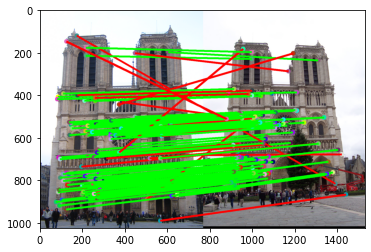

In [12]:
from proj3_code.utils import evaluate_correspondence
# num_pts_to_evaluate = len(matches)
num_pts_to_evaluate = 100
_, c = evaluate_correspondence(image1, image2, eval_file, scale_factor,
                        x1[matches[:num_pts_to_evaluate, 0]], y1[matches[:num_pts_to_evaluate, 0]],
                        x2[matches[:num_pts_to_evaluate, 1]], y2[matches[:num_pts_to_evaluate, 1]])
plt.figure(); plt.imshow(c)
plt.savefig('../results/eval.jpg', dpi=1000)